In [107]:
import pandas as pd 
import numpy as np
import nltk
nltk.download('punkt')
import RAKE
import wordcloud as w
import matplotlib.pyplot as plt
import operator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot as skplt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to C:\Users\FRED
[nltk_data]     OJOK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [108]:
###1. IMPORT THE NECESSARY LIBRARIES AND READ THE CSV
##FLOW GENERATORS


#loading the directories

job_postings= r'C:\Users\FRED OJOK\Downloads\dice_com-job_us_sample.csv.zip'

data= pd.read_csv(job_postings)
#df_job

#Preview the first 5 lines of the loaded data
data.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [109]:
## 2. CLEANING OF DATA
# 2.1 Remove unnecessary columns

# Remove postdate, shift, sitename
data.drop('jobid', inplace= True, axis=1)
data.drop('site_name', inplace= True, axis=1)
data.drop('shift', inplace= True, axis=1)
data.drop('uniq_id', inplace= True, axis=1)
data.drop('postdate', inplace= True, axis=1)

df_job.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,Label
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",Cloud Architect/Network
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in...",IT Business Management
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma...",Cloud Architect/Network
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,"Chicago, IL",SAP FICO Architect,"FICO, AR, AP, Asset Management, HAHA",IT Business Management
6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,"Atlanta, GA",Network Engineer,"Cisco, DNS, HTTP, Networking, Network Engineer...",Cloud Architect/Network


In [110]:
#2.2 Remove duplicates
data.drop_duplicates()
data.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,SEE BELOW
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Please see job description
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma..."


In [111]:
#2.3 Drop Empty and rubbish words
# Check to see if we have any missing values at all
print(data.isnull().values.any())

#Since the above results is true, check number of missing values in each row
data.isna().sum()

True


advertiserurl                 0
company                      50
employmenttype_jobstatus    230
jobdescription                0
joblocation_address           3
jobtitle                      0
skills                       43
dtype: int64

In [112]:
# Total number of missing values
data.isnull().sum().sum()

326

In [113]:
# Drop all the rows that have any NaN values
data.dropna(inplace= True)

## Check that there is no more na
data.isna().sum()

advertiserurl               0
company                     0
employmenttype_jobstatus    0
jobdescription              0
joblocation_address         0
jobtitle                    0
skills                      0
dtype: int64

In [115]:
# Get index of all rows in the skills that contains the value 'Null'
jobsNull = data[data['skills']== 'Null'].index
#Get index of all rows in the skills that contains the value 'Please see job description'
jobsDesc1= data[data['skills']=='Please see job description'].index
jobsDesc2= data[data['skills']=='(See Job Description)'].index
jobsDesc3= data[data['skills']=='SEE BELOW'].index
jobsDesc4= data[data['skills']=='Telecommuting not available Travel not required'].index
jobsDesc5= data[data['skills']=='Refer to Job Description'].index
jobsDesc6= data[data['skills']=='Please see Required skills'].index

#Drop rows of index
data.drop(jobsNull, inplace= True)
data.drop(jobsDesc1, inplace= True)
data.drop(jobsDesc2, inplace= True)
data.drop(jobsDesc3, inplace= True)
data.drop(jobsDesc4, inplace= True)
data.drop(jobsDesc5, inplace= True)
data.drop(jobsDesc6, inplace= True)

In [116]:
# Print info of Data Frame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 1 to 21998
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             21613 non-null  object
 1   company                   21613 non-null  object
 2   employmenttype_jobstatus  21613 non-null  object
 3   jobdescription            21613 non-null  object
 4   joblocation_address       21613 non-null  object
 5   jobtitle                  21613 non-null  object
 6   skills                    21613 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [117]:
### DATA VISUALIZATION OF THE DATA
## 1. Top 5 Most Demand Jobs

#See the top 5 highest frequency of job titles
data['jobtitle'].value_counts()[:5]

Java Developer       174
Project Manager      144
Network Engineer     127
Software Engineer    118
Business Analyst     117
Name: jobtitle, dtype: int64

In [118]:
jobsCleaned= []
job= []
stopwordsList= []

#Get the stopwords and store in list
with open(r'C:\Users\FRED OJOK\Documents\SW.txt') as f:
    for word in f:
        word= word.split('\n')
        stopwordsList.append(word[0])
        
# Tokenizing and Removing stop words from jobtitle
from nltk.tokenize import word_tokenize
import nltk

#Convert all the words to lower case and change the short form
for i in data['jobtitle'].values:
    jobs= i.lower()
    jobs= jobs.replace('QA', 'Quality Assurance')
    jobs= jobs.replace('sr', 'Senior')
    jobs= jobs.replace('jr', 'Junior')
    jobs= jobs.replace('qm', 'Quality Manager')
    job.append(jobs)
    
#Tokenize and remove the words from the stop words
for j in job:
    text_tokens= word_tokenize(j)
    tokens_without_sw= [f for f in text_tokens if not f in stopwordsList]
    jobsCleaned.append(' '.join(tokens_without_sw))

In [120]:
data.describe()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills
count,21613,21613,21613,21613,21613,21613,21613
unique,21613,4244,2922,20155,1562,14977,18886
top,https://www.dice.com/jobs/detail/Information-S...,CyberCoders,Full Time,Title IT Security Analyst – Threats and Vulner...,"New York, NY",Java Developer,See job description
freq,1,335,6733,10,1340,174,69


In [122]:
#Get the top 5 jobs
qty= data['jobtitle'].value_counts()[:5].tolist()
label= data['jobtitle'].value_counts()[:5].index.tolist()
print(qty)
print('Top 5 popular jobs:'+str(label))

[174, 144, 127, 118, 117]
Top 5 popular jobs:['Java Developer', 'Project Manager', 'Network Engineer', 'Software Engineer', 'Business Analyst']


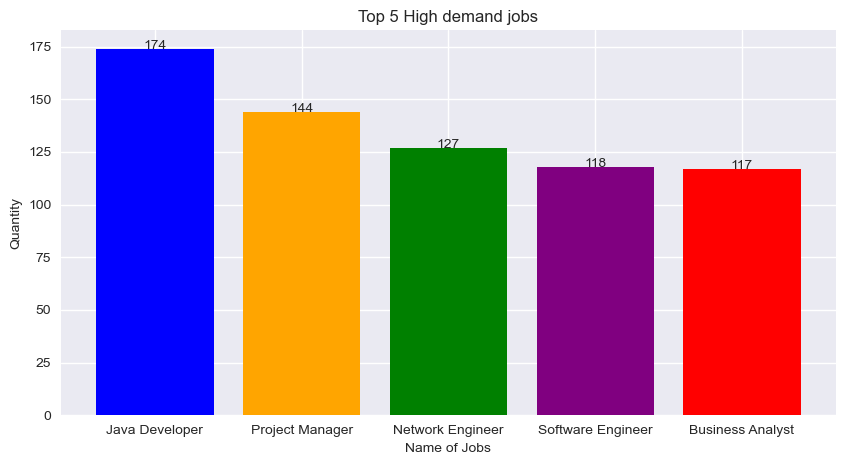

In [124]:
def addlabels(x,y):
    for i in range (len(x)):
        plt.text(i, y[i], y[i], ha= 'center')
        
## Initializing the labels
skillslabel= label
jobQty= qty

#setting figure size by using figure() function
plt.figure(figsize= (10,5))

#Making the bar chart on the data
plt.bar(skillslabel, jobQty, color=['blue','orange','green','purple','red'])

#Calling the function to add to add value labels
addlabels(skillslabel, jobQty)

#Giving title to the plot
plt.title('Top 5 High demand jobs')

#Giving X and Y labels
plt.xlabel('Name of Jobs')
plt.ylabel('Quantity')

#Visualizing the plot
plt.show()

In [125]:
### 2. Most Used Skills
skillsTokenized= []
stopwordSkills= []

#Get the stop words and store in list
with open (r'C:\Users\FRED OJOK\Documents\SW.txt',encoding='utf-8') as f:
    for word in f:
        word.lower()
        word= word.split('\n')
        
        stopwordSkills.append(word[0])
        
for k in df_job['skills'].values:
    k= str(k).split(',')
    #remove stopwords from skill
    skillstokens_without_sw= [f for f in k if not f.lower() in stopwordSkills]
    for j in skillstokens_without_sw:
        skillsTokenized.append(j)
        
#Put the cleaned skills into a new data frame
df=pd.DataFrame({'skills': skillsTokenized})

In [127]:
# Get the top 5 jobs

qtySkills= df['skills'].value_counts().tolist()
labelSkills= df['skills'].value_counts().index.tolist()
print('Top 5 skills mostly needed \n' + str(df['skills'].value_counts()[:5]))

Top 5 skills mostly needed 
 Development    1610
 Management     1502
 SQL            1440
 Java           1123
 Project         953
Name: skills, dtype: int64


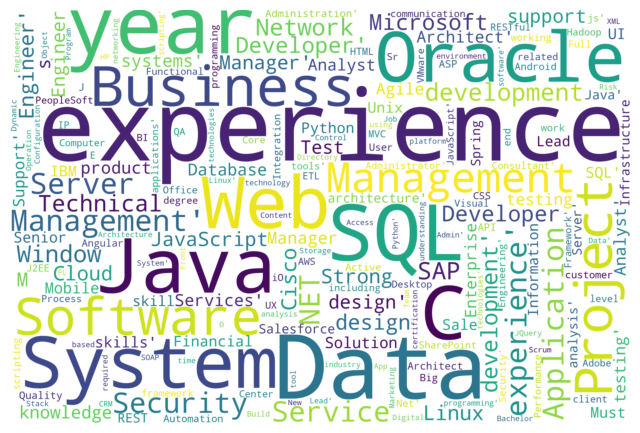

<Figure size 300000x300000 with 0 Axes>

In [128]:
import wordcloud as w
import numpy as np
import matplotlib.pyplot as plt

lskills= labelSkills
frequencies= qtySkills

#Wordcloud asks for a string and i have tried separating to terms with ',' and '~'
d=dict(zip(lskills, frequencies))
wordcloud= w.WordCloud(collocations= False,random_state=1,background_color='white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000,3000))
plt.show()

In [129]:
### 3. Data Mining
## 3.1 TF-IDF

vectorizer= TfidfVectorizer()
X= vectorizer.fit_transform(df_job['jobtitle'].values)
print(X.shape)
analyze= vectorizer.build_analyzer()
#print('Job titles', analyze(str(jobtitle)))
#print('Document transform', X.toarray())

#print(vectorizer.get_feature_names_out())
features= vectorizer.get_feature_names_out()
#indices= zip(*X.nonzero())

#for row,column in indices:
    #print('%d, %s) %f' %(row, features[column], X[row, column])


(21613, 4904)


In [130]:
### 4. Clustering Using KMeans
## 4.1 Getting the optimize cluster using elbow method

#Using the elbow method to find the optimal number of clusters
#within cluster Sum of squares( WCSS)

wcss= []
for i in range(1,15):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=600,n_init=1)
    kmeans.fit(X)
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

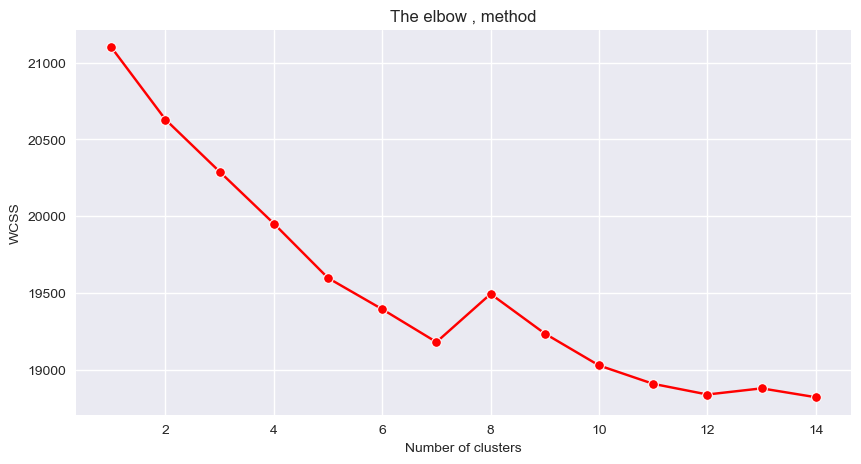

In [131]:
# Plotting the graph
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,15), y=wcss, marker='o', color='red')
plt.title('The elbow , method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [133]:
true_k=7
model=KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=1, random_state= 42)
pred= model.fit_predict(X)
order_centroids= model.cluster_centers_.argsort()[:,::-1]
terms= vectorizer.get_feature_names_out()

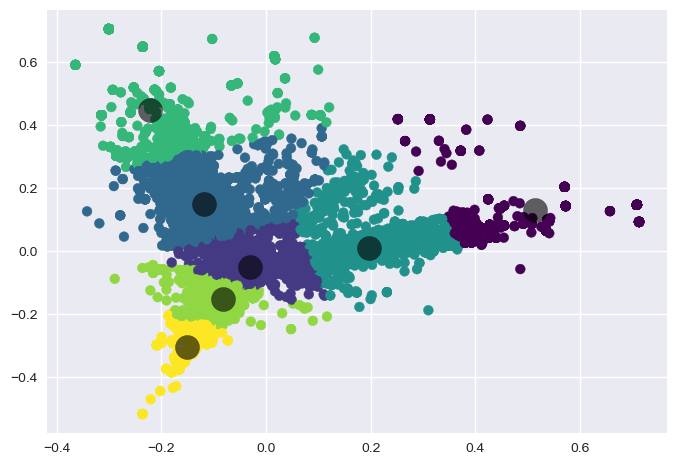

In [135]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sklearn_pca= PCA(n_components=2)

Y_sklearn= sklearn_pca.fit_transform(X.toarray())
kmeans= KMeans(n_clusters=7, init='k-means++', max_iter=600, n_init=1, random_state=42)

fitted=kmeans.fit(Y_sklearn)

prediction= kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c=prediction, s=50, cmap='viridis')

centers= kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='black', s=300, alpha=0.6);

In [136]:
# Silhouette score value ranges from -1 to 1
#metric used to calculate the goodness of a clustering technique
# 1. Means clusters are well apart from each other and clearly distinguished
from sklearn.metrics import silhouette_score
print ('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(X, model.labels_, metric='euclidean')))

KMeans Scaled Silhouette Score: 0.04008087501265561


In [137]:
import numpy as np

def get_top_keywords(data, clusters, labels, n_terms):
    df= pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i, r in df.iterrows():
        print('\nCluster{}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        
get_top_keywords(X, pred, features, 10)


Cluster0
full,front,ui,end,sr,web,senior,net,java,developer

Cluster1
technology,sap,developer,senior,support,technical,specialist,lead,consultant,administrator

Cluster2
technical,sr,it,support,senior,security,systems,data,business,analyst

Cluster3
coordinator,development,sr,senior,product,technical,program,it,project,manager

Cluster4
data,qa,test,sr,security,devops,systems,senior,network,engineer

Cluster5
embedded,net,test,java,sr,developer,development,senior,engineer,software

Cluster6
application,java,technical,security,enterprise,cloud,solutions,data,solution,architect


In [138]:
### 5. CLASSIFICATION
## Do further classification, Give the 0,1,2,3 a name to understand better

#Cluster 0= Project Management, cluster1= frontend, cluster2=Devops/software Engineer, cluster3= 
#Business Solution Consultant, cluster4=Cloud Architects/Network, cluster5=Analyst,
#cluster6= IT Business Management

label= []
for i in df_job['jobtitle'].values:
    
    vec=vectorizer.transform([i])
    pred=model.predict(vec)
    if pred==0:
        label.append('Project Management')
    elif pred==1:
        label.append('Frontend')
    elif pred==2:
        label.append('Devops/Software Engineer')
    elif pred==3:
        label.append('Business Solution Consultant')
    elif pred==4:
        label.append('Cloud Architect/Network')
    elif pred==5:
        label.append('Analyst')
    else:
        label.append('IT Business Management')
        
df_job['Label']=label
df_job.head()
    

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,Label
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,"linux/unix, network monitoring, incident respo...",Cloud Architect/Network
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,"Enterprise Solutions Architecture, business in...",IT Business Management
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,"Configuration Management, Developer, Linux, Ma...",Cloud Architect/Network
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,"Chicago, IL",SAP FICO Architect,"FICO, AR, AP, Asset Management, HAHA",IT Business Management
6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,"Atlanta, GA",Network Engineer,"Cisco, DNS, HTTP, Networking, Network Engineer...",Cloud Architect/Network


In [139]:
jobSkills= []
for i in df_job['skills']:
    jobSkills.append(i.lower())
    
Xclass= vectorizer.fit_transform(jobSkills)

#Split data into test and train. Test size 20% Train size 80%
X_train, X_test, y_train, y_test= train_test_split(Xclass, label, test_size=0.2, random_state=42)

Text(0, 0.5, 'Accuracy')

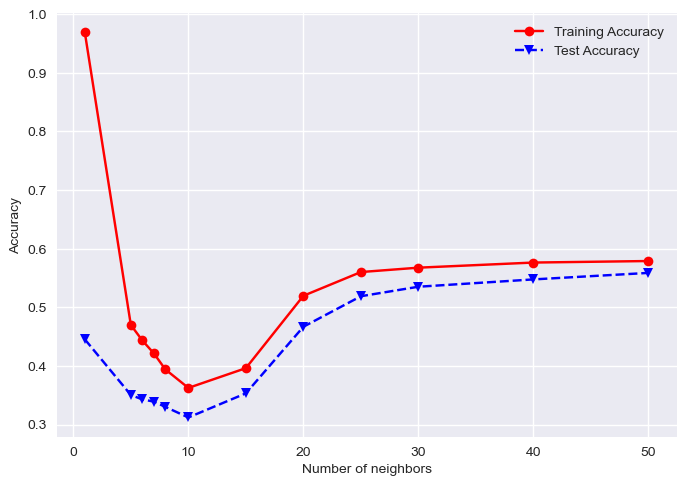

In [140]:
### 5.2 KNeighbors Classifier
%matplotlib inline

numNeighbors= [1,5,6,7,8,10,15,20,25,30,40,50]
trainAcc= []
testAcc= []

for k in numNeighbors:
    clf1= KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
    clf1.fit(X_train, y_train)
    Y_predTrain= clf1.predict(X_train)
    Y_predTest= clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [141]:
### Let 50 be the n_neighbors
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
knn_pred= clf1.predict(X_test)
knn_acc= accuracy_score(y_test, knn_pred)
print('Accuracy of KNN:'+str(knn_acc))
print(classification_report(y_test, knn_pred))

Accuracy of KNN:0.5586398334489937
                              precision    recall  f1-score   support

                     Analyst       0.70      0.26      0.37       250
Business Solution Consultant       0.62      0.47      0.54       294
     Cloud Architect/Network       0.57      0.39      0.46       585
    Devops/Software Engineer       0.74      0.32      0.45       388
                    Frontend       0.61      0.67      0.64      1809
      IT Business Management       0.66      0.20      0.31       250
          Project Management       0.44      0.81      0.57       747

                    accuracy                           0.56      4323
                   macro avg       0.62      0.44      0.48      4323
                weighted avg       0.59      0.56      0.54      4323



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

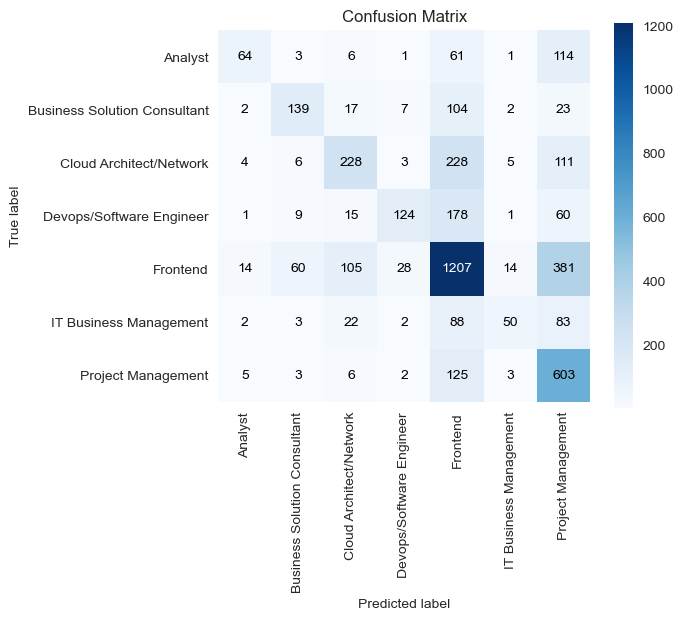

In [142]:
skplt.metrics.plot_confusion_matrix(
     y_test,
     knn_pred,
     x_tick_rotation=90,
     figsize= (6,5))

Text(0, 0.5, 'Accuracy')

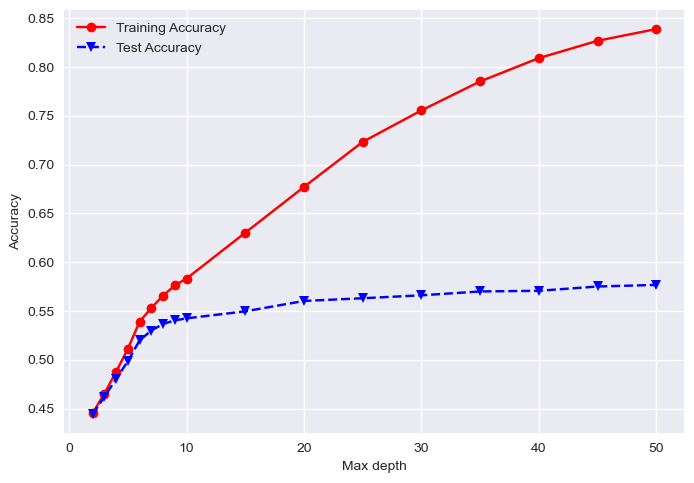

In [143]:
### Decision Tree
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50] # 17 different depths

trainAccuracy= np.zeros(len(maxdepths))
testAccuracy= np.zeros(len(maxdepths))

index=0
for depth in maxdepths:
    clf2=DecisionTreeClassifier(max_depth= depth)
    clf2= clf2.fit(X_train, y_train)
    Y_predTrain= clf2.predict(X_train)
    Y_predTest= clf2.predict(X_test)
    trainAccuracy[index]=accuracy_score(y_train, Y_predTrain)
    testAccuracy[index]=accuracy_score(y_test, Y_predTest)
    index +=1
    
#####################################################################
#Plot training and test accuracy
#####################################################################

plt.plot(maxdepths, trainAccuracy, 'ro-', maxdepths, testAccuracy,'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [144]:
## Let max_depth be 7
dt= DecisionTreeClassifier(max_depth=10)
dt2= dt.fit(X_train, y_train)
dt_pred= dt2.predict(X_test)
dt_acc= accuracy_score(y_test, dt_pred)
print('Accuracy of Decision Tree:'+str(dt_acc))
print(classification_report(y_test, dt_pred))

Accuracy of Decision Tree:0.5417534119824197
                              precision    recall  f1-score   support

                     Analyst       0.50      0.27      0.35       250
Business Solution Consultant       0.59      0.29      0.39       294
     Cloud Architect/Network       0.65      0.26      0.37       585
    Devops/Software Engineer       0.75      0.35      0.48       388
                    Frontend       0.53      0.76      0.63      1809
      IT Business Management       0.70      0.27      0.39       250
          Project Management       0.48      0.62      0.54       747

                    accuracy                           0.54      4323
                   macro avg       0.60      0.40      0.45      4323
                weighted avg       0.57      0.54      0.52      4323



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

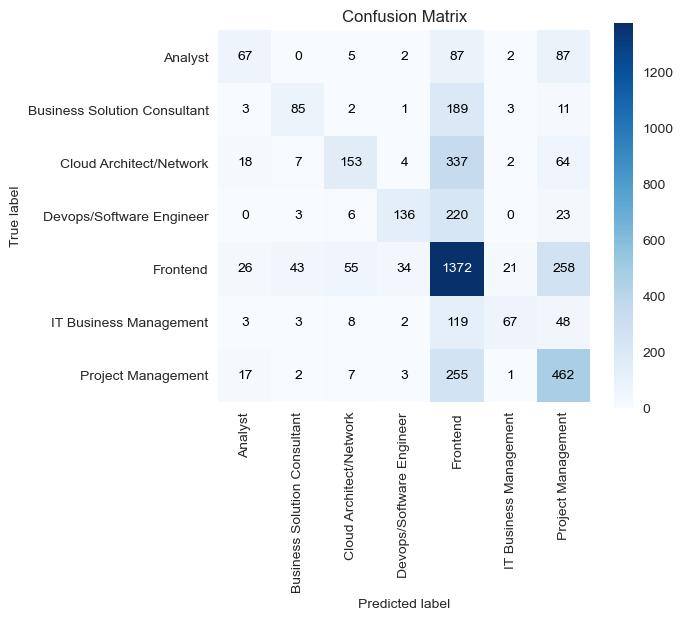

In [145]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    dt_pred,
    x_tick_rotation= 90,
    figsize= (6,5))

Text(0, 0.5, 'Accuracy')

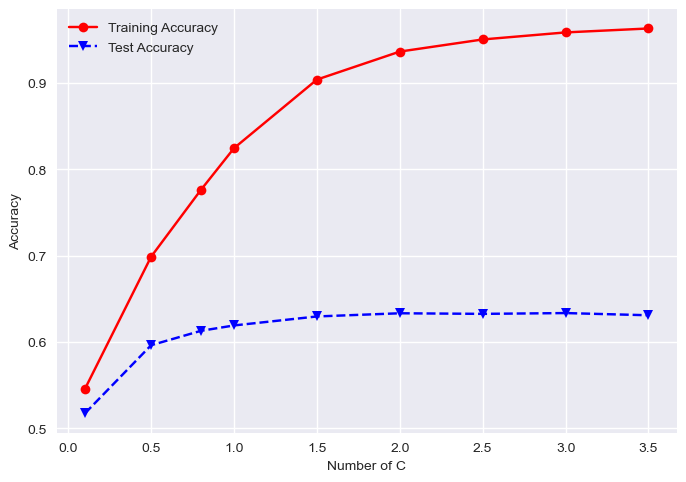

In [146]:
### 5.4 Support Vector Machines
Csvm=[0.1,0.5,0.8,1,1.5,2,2.5,3,3.5]

trainAcc= []
testAcc= []

for c in Csvm:
    modelsvm= svm.SVC(C= c, gamma=1, kernel='rbf')
    svmfit=modelsvm.fit(X_train, y_train)
    Y_predTrain= modelsvm.predict(X_train)
    Y_predTest= modelsvm.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
plt.plot(Csvm, trainAcc, 'ro-', Csvm, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of C')
plt.ylabel('Accuracy')

In [40]:
svm=svm.SVC(C=5, gamma=1, kernel='rbf',probability=True)
svmfit= svm.fit(X_train, y_train)
svm_predictions= svmfit.predict(X_test)
svm_acc=accuracy_score(y_test, svm_predictions)
print('Accuracy of SVM:'+str(svm_acc))
print(classification_report(y_test, svm_predictions))

Accuracy of SVM:0.6268794818413139
                              precision    recall  f1-score   support

                     Analyst       0.69      0.46      0.56       250
Business Solution Consultant       0.73      0.52      0.61       294
     Cloud Architect/Network       0.59      0.50      0.54       585
    Devops/Software Engineer       0.72      0.47      0.57       388
                    Frontend       0.61      0.77      0.68      1809
      IT Business Management       0.71      0.39      0.51       250
          Project Management       0.61      0.65      0.63       747

                    accuracy                           0.63      4323
                   macro avg       0.67      0.54      0.58      4323
                weighted avg       0.64      0.63      0.62      4323



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

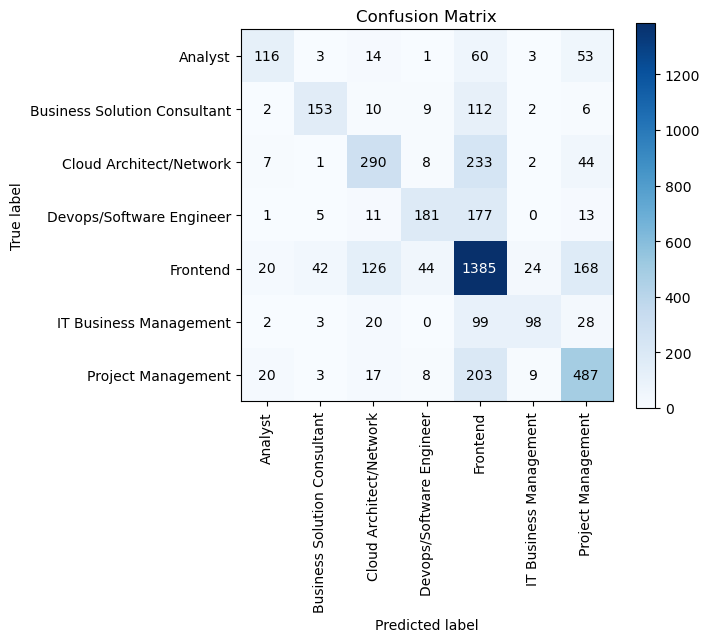

In [41]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    svm_predictions,
    x_tick_rotation= 90,
    figsize= (6,5))

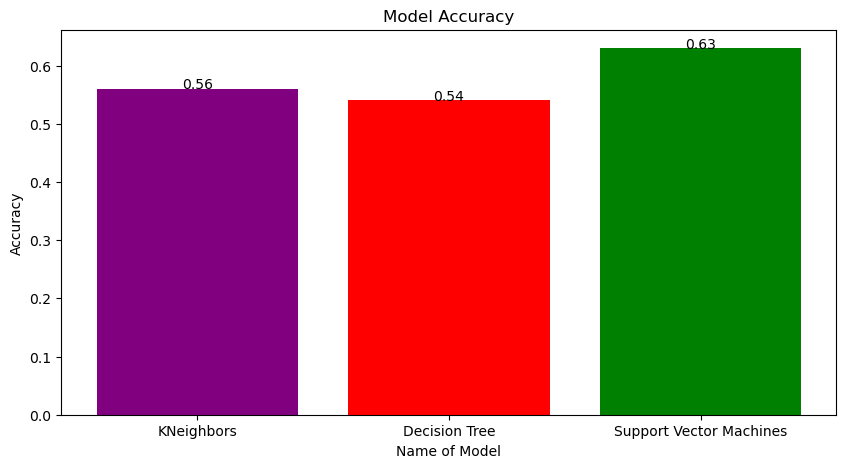

In [42]:
#### NOW LETS EVALUATE THE 4 DIFFERENT ALGORITHMS AND DETERMINE THE BEST CLASSIFICATION ALGORITHM
###6. Determine Best classification to use
##6.1 Accuracy

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha= 'center')
        
## initialializing the labels and model accuracy. The model accuracy round up to 2dp
labels= ('KNeighbors', 'Decision Tree','Support Vector Machines')
modelsAccuracy= [round(knn_acc,2), round(dt_acc,2), round(svm_acc,2)]

#Setting figure size by using figure() function
plt.figure(figsize=(10,5))

#making the bar chart on the data
plt.bar(labels, modelsAccuracy, color=['red', 'green', 'blue'])

#Calling the function to add value labels
addlabels(labels, modelsAccuracy)

#giving title to the plot
plt.title('Model Accuracy')

#giving X and Y labels
plt.xlabel('Name of Model')
plt.ylabel('Accuracy')

#Visualizing the plot
plt.show()

In [43]:
### Model Accuracy
#Predict probabilities
#lrg_prob= lrg.predict_proba(X_test)[::,1] #REMOVED LRG
knn_prob=knn.predict_proba(X_test)[::,1]
dt_prob= dt.predict_proba(X_test)[::,1]
svm_prob= svm.predict_proba(X_test)[::,1]

#roc curve for models

#fprlrg, tprlrg, threshlrg= roc_curve(y_test, lrg_prob, pos_label= 'Business Solution Consultant')
fprknn, tprknn, threshknn= roc_curve(y_test, knn_prob, pos_label= 'Business Solution Consultant')
fprdt, tprdt, threshdt= roc_curve(y_test, dt_prob, pos_label= 'Business Solution Consultant')
fprsvm, tprsvm, threshsvm= roc_curve(y_test, svm_prob, pos_label= 'Business Solution Consultant')

##roc curve for tpr=fpr
random_probs= [0 for i in range (len(y_test))]
p_fpr, p_tpr, _ =roc_curve(y_test, random_probs, pos_label= 'Business Solution Consultant')

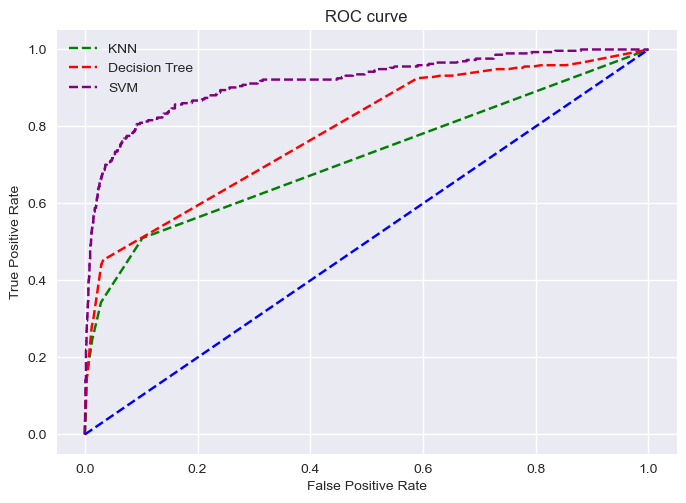

In [44]:
plt.style.use('seaborn')

#plot roc curves
#plt.plot(fprlrg, tprlrg, linestyle='--',color='orange', label='Logistic Rgression') #REMOVED LRG
plt.plot(fprknn, tprknn, linestyle='--', color='green', label='KNN')
plt.plot(fprdt, tprdt, linestyle='--', color='red', label='Decision Tree')
plt.plot(fprsvm, tprsvm,linestyle='--', color='purple', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
#title
plt.title('ROC curve')
#xlabel
plt.xlabel('False Positive Rate')
#ylabel
plt.ylabel('True Positive Rate')

plt.legend(loc= 'best')
plt.savefig('ROC', dpi=300)
plt.show();


In [ ]:
### NB: OVERALL, SVM DOES BETTER THAN THE REST IN TERMS OF ACCURACY AND ROC CURVE

In [45]:
### 7. Data Analysis (WordCloud) on the different labels
## 7.1 Finding out what are the skills needed for each job role
# Frontend

labelData=df_job[df_job['Label']=='Frontend']

skillsClass= []

for index,row in labelData.iterrows():
    skills= [row['skills']]
    skillstokens_without_sw=[f for f in skills if not f.lower() in stopwordSkills]
    
    for j in skillstokens_without_sw:
        skillsClass.append(j)
        
#put the cleaned skills into a new dataframe
df_frontend= pd.DataFrame({'skills': skillsClass})

qtySkills= df_frontend['skills'].value_counts().tolist()
labelSkills= df_frontend['skills'].value_counts().index.tolist()

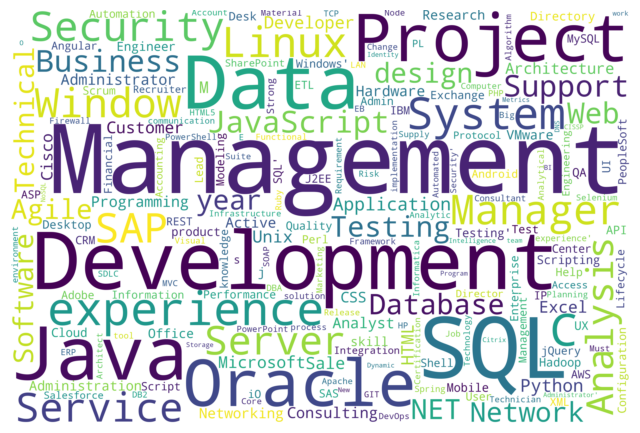

<Figure size 300000x300000 with 0 Axes>

In [46]:
lskills=labelSkills
frequencies= qtySkills

#WordCloud asks for a string, and i have tried separating the terms with ',' and '~'
d=dict(zip(lskills, frequencies))
wordcloud= w.WordCloud(collocations=False, random_state=1, background_color='white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000,3000))
plt.show()

In [50]:
## 7.1.2 Analyst
labelData= df_job[df_job['Label']=='Analyst']

skillsClass= []

for index, row in labelData.iterrows():
    skills=[row['skills']]
    skillstoken_without_sw=[f for f in skills if not f.lower() in stopwordSkills]
    for j in skillstokens_without_sw:
        skillsClass.append(j)
        
#Put the cleaned skills into a new dataframe
df_analyst= pd.DataFrame({'skills': skillsClass})

qtySkills= df_analyst['skills'].value_counts().tolist()
labelSkills= df_analyst['skills'].value_counts().index.tolist()

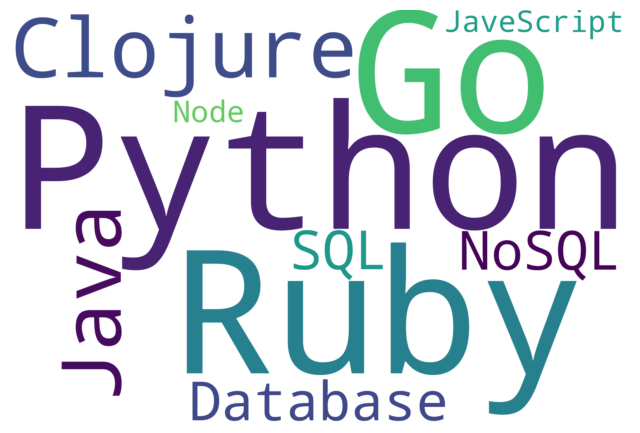

<Figure size 300000x300000 with 0 Axes>

In [51]:
lskills=labelSkills
frequencies= qtySkills

#Wordcloud ask for a string, and i have tried separating the terms with ',' and .'~'
d= dict(zip(lskills,frequencies))
wordcloud=w.WordCloud(collocations=False, random_state=1, background_color='white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(3000,3000))
plt.show()

In [52]:
### 7.1.3 Business Solution Consultation
labelData= df_job[df_job['Label']=='Business Solution Consultant']

skillsClass=[]

for index,row in labelData.iterrows():
    skills=[row['skills']]
    skillstoken_without_sw=[f for f in skills if not f.lower() in stopwordSkills]
    for j in skillstokens_without_sw:
        skillsClass.append(j)
        
#Put the cleaned skills into a new dataframe
df_consultant= pd.DataFrame({'skills': skillsClass})

qtySkills= df_consultant['skills'].value_counts().tolist()
labelSkills= df_consultant['skills'].value_counts().index.tolist()

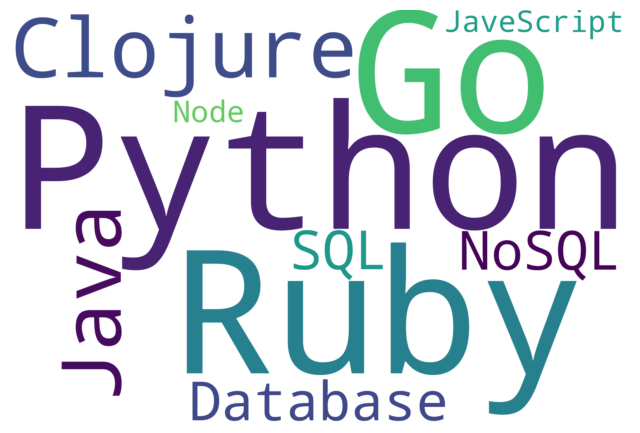

<Figure size 300000x300000 with 0 Axes>

In [53]:
lskills= labelSkills
frequencies=qtySkills

#Wordcloud ask for a string, and i have tried separating the terms with ',' and '~'
d=dict(zip(lskills, frequencies))
wordcloud= w.WordCloud(collocations=False, random_state=1, background_color='white', width=3000, height=2000).generate (str(d))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(3000,3000))
plt.show()

In [68]:
## 7.1.4 Cloud Architect/ Network
labelData= df_job[df_job['Label']=='Cloud Architect/Network']

skillsClass=[]

for index, row in labelData.iterrows():
    skills=[row['skills']]
    skillstokens_without_sw=[f for f in skills if not f.lower() in stopwordSkills]
    for j in skillstoken_without_sw:
        skillsClass.append(j)
        
#Put thr cleaned skills into a new dataframe
df_cloud=pd.DataFrame({'skills':skillsClass})

qtySkills=df_cloud['skills'].value_counts().tolist()
labelSkills=df_cloud['skills'].value_counts().index.tolist()

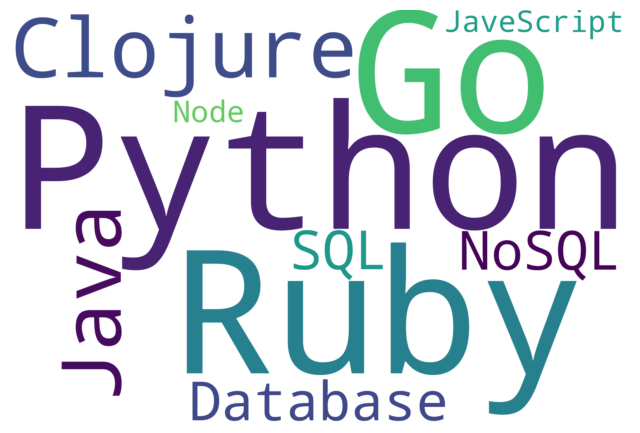

<Figure size 300000x300000 with 0 Axes>

In [56]:
lskills=labelSkills
frequencies=qtySkills

#WordCloud asks for a string, and I have tried separating the terms with ',', '~'

d=dict(zip(lskills, frequencies))
wordCloud= w.WordCloud(collocations= False, random_state=1, background_color='white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(3000, 3000))
plt.show()

In [69]:
### 7.1.5 Devops/ Software Engineer

labelData= df_job[df_job['Label']=='Devops/software Engineer']

skillsClass= []

for index, row in labelData.iterrows():
    skills=[row['skills']]
    skillstokens_without_sw=[f for f in skills if not f.lower() in stopwordSkills]
    for j in skillstoken_without_sw:
        skillsClass.append(j)
        
#put the demand skills into a new dataframe
df_engineer=pd.DataFrame({'skills':skillsClass})

qtySkills= df_engineer['skills'].value_counts().tolist()
labelSkills= df_engineer['skills'].value_counts().index.tolist()

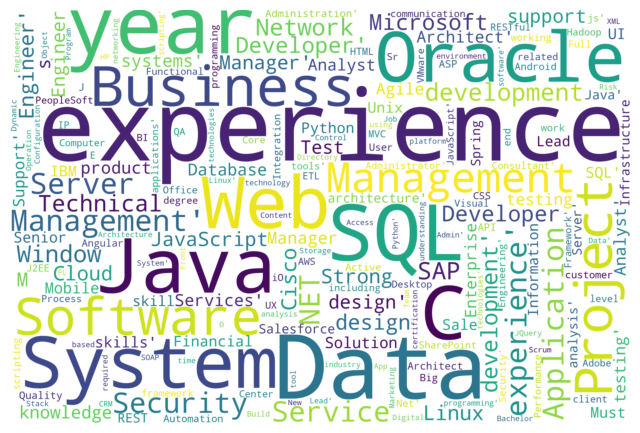

<Figure size 300000x300000 with 0 Axes>

In [147]:
lskills= labelSkills
frequencies= qtySkills

#Wordcloud asks for a string, and i have tried separating with ',' and '~'

d= dict(zip(lskills, frequencies))
wordcloud= w.WordCloud(collocations= False, random_state=1, background_color='white', width= 3000, height= 2000).generate(str(d))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(3000,3000))
plt.show()

In [77]:
### 7.1.6 IT Business Management

labelData=df_job[df_job['Label']=='IT Business Management']

skillsClass= []

for index, row in labelData.iterrows():
    skills=[row['skills']]
    skillstokens_without_sw=[f for f in skills if not f.lower() in stopwordSkills]
    for j in skillstokens_without_sw:
        skillsClass.append(j)
        
#Put the cleaned skills into a new dataframe
df_bus= pd.DataFrame({'skills':skillsClass})

qtySkills= df_bus['skills'].value_counts().tolist()
labelSkills= df_bus['skills'].value_counts().index.tolist()

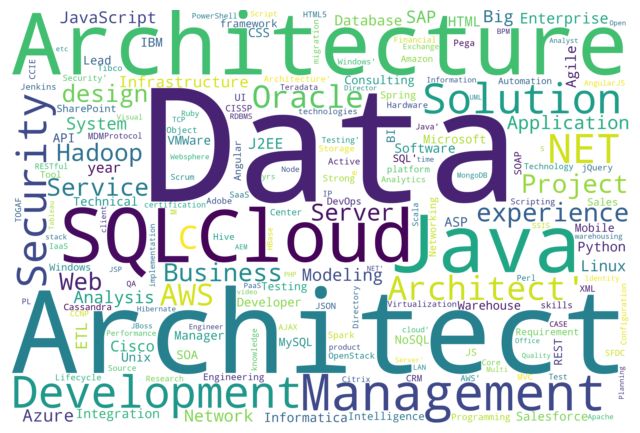

<Figure size 300000x300000 with 0 Axes>

In [78]:
lskills=labelSkills
frequencies= qtySkills

#Wordclous asks for a string and i have tried separating the terms with ',' and '~'

d=dict(zip(lskills, frequencies))
wordcloud=w.WordCloud(collocations=False, random_state=1, background_color='white', width=3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.figure(figsize=(3000,3000))
plt.show()

In [79]:
### 7.1.7 Project Management
labelData= df_job[df_job['Label']=='Project Management']

skillsClass=[]

for index, row in labelData.iterrows():
    skills=[row['skills']]
    skillstokens_without_sw=[f for f in skills if not f.lower() in stopwordSkills]
    for j in skillstoken_without_sw:
        skillsClass.append(j)
        
#Put the cleaned skills into a new dataFrame
df_pro=pd.DataFrame({'skills': skillsClass})

qtySkills= df_pro['skills'].value_counts().tolist()
labelSkills= df_pro['skills'].value_counts().index.tolist()

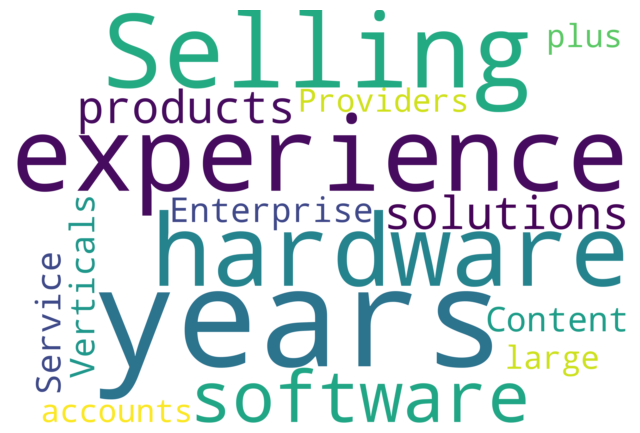

<Figure size 300000x300000 with 0 Axes>

In [80]:
lskills= labelSkills
frequencies= qtySkills

#wordcloud asks for a string and i have tried separating the terms with ',' and '~'

d= dict(zip(lskills, frequencies))
wordcloud= w.WordCloud(collocations= False, random_state=1, background_color= 'white', width= 3000, height=2000).generate(str(d))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(3000,3000))
plt.show()

In [81]:
###7. Get user input
userInput= input('Enter your skills:')
pred= vectorizer.transform([userInput.lower()])

output= svm.predict(pred)
print(output[0])

Enter your skills:html, ui/ux, angularjs
Project Management


In [82]:
###8. From the class, find the one that suits most to the user's input by doing Cosine Similarity/Euclidean Distance
# 8.1 Cosine Similarity

cos=[]
labelData= df_job[df_job['Label']==output[0]]

for index, row in labelData.iterrows():
    skills=[row['skills']]
    skillVec= vectorizer.transform(skills)
    cos_lib=cosine_similarity(skillVec, pred)
    #print(cos_lib[0][0])
    cos.append(cos_lib[0][0])
    
labelData['cosine_similarity']=cos

In [87]:
#Display top 5 recommendation from cosine similarity
top_5= labelData.sort_values('cosine_similarity', ascending= False)[['advertiserurl','company','employmenttype_jobstatus','jobdescription','jobtitle','skills','Label', 'cosine_similarity']]


top_5.head(5)

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobtitle,skills,Label,cosine_similarity
2989,https://www.dice.com/jobs/detail/Java-Develope...,Contech Systems Online,C2H W2,Several roles with direct client located in Ba...,Java Developer/Front End/UI/UX/Mobile,Javascript/UI/AngularJS/HTML/UI/UX,Project Management,0.912815
11134,https://www.dice.com/jobs/detail/Java-Develope...,Contech Systems Online,"C2H Corp-To-Corp, C2H Independent, C2H W2",Several roles with direct client located in Ba...,Java Developer/Front End/UI/UX/Mobile,Javascript/UI/AngularJS/HTML/UI/UX,Project Management,0.912815
3324,https://www.dice.com/jobs/detail/Web-Developer...,SS & C Technologies Inc,Full Time,"WEB DEVELOPER at Sandy Hook, CTLocation: Sandy...","Web Developer - HTML, JavaScript, CSS, UI/UX, C#",HTML; JavaScript; CSS C#; UI/UX,Project Management,0.714743
6105,https://www.dice.com/jobs/detail/Android-Devel...,Aquinas Consulting,Full Time,We are seeking an Android developer who is hig...,Android Developer,UI/UX Experience,Project Management,0.669540
15271,https://www.dice.com/jobs/detail/UI-%2526%2523...,"Aureon IT, Inc","Contract Corp-To-Corp, Contract Independent, C...",•HTML5•CSS3•JavaScript•jQuery•jQuery UI•JavaSc...,UI / UX Developer,UI/UX Experience,Project Management,0.669540


In [89]:
###8.2 Euclidean Distance

euclidean= []
labelData= df_job[df_job['Label']==output[0]]

for index, row in labelData.iterrows():
    skills=[row['skills']]
    skillVec= vectorizer.transform(skills)
    euclidean_dist=euclidean_distances(skillVec, pred)
    euclidean.append(euclidean_dist[0][0])
    
labelData['euclidean_distance']=euclidean

In [93]:
#Display top 5 recommendation from cosine similarity
top_5= labelData.sort_values('euclidean_distance', ascending= False)[['advertiserurl','company','employmenttype_jobstatus','jobdescription', 'joblocation_address', 'jobtitle', 'skills', 'Label','euclidean_distance']]

top_5.head(5)

,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,Label,euclidean_distance
7,https://www.dice.com/jobs/detail/Sr.-Web-Appli...,"Bluebeam Software, Inc.","Full Time, Full Time",Bluebeam is looking for talented sr. web devel...,"Chicago, IL",Sr. Web Application Developer (Cloud Team) - C...,".NET , C#, MVC, RESTful web services, HTTP, AW...",Project Management,1.414214
3435,https://www.dice.com/jobs/detail/WebGL-Front-E...,Datanomics,"Contract W2, 12+ Months","Datanomics, a full service provider of compute...","Basking Ridge, NJ",WebGL Front End Developer,"HTML5, Javascripts, CSS, WebGL, Angular JS",Project Management,1.414214
17809,https://www.dice.com/jobs/detail/C%2523%2526%2...,MW Partners LLC,"Contract Corp-To-Corp, Contract Independent, C...",Position: C#/.NET/Java Developer Location: New...,"Newport Beach, CA","C#/.NET/Java Developer local CA, F2F, 10 YR Ex...","Java and/or C# development , financial industr...",Project Management,1.414214
13808,https://www.dice.com/jobs/detail/salesforce-De...,Stratitude Inc,"Contract Corp-To-Corp, Contract Independent, C...",Role: Salesforce DeveloperWork Location : San ...,"San Diego, CA",salesforce Developer,"salesforce, Apex, CRM",Project Management,1.414214
17749,https://www.dice.com/jobs/detail/Murex-Develop...,Options Group,"Full Time, Contract Corp-To-Corp, Contract Ind...",Bachelor's degree in computer science engineer...,"New York, NY",Murex Developer,"""Murex"" ""Java"" ""Fixed income"" ""Equities"" ""Mark...",Project Management,1.414214


In [105]:
## 9. Finak Job Recommendadtion
userInput= input('Enter your skills:')
pred= vectorizer.transform([userInput.lower()])

output=svm.predict(pred)
print('You many look into' +output[0]+'jobs')
print('Here is a list of jobs that is under'+output[0])

cos=[]
labelData=df_job[df_job['Label']==output[0]]

for index,row in labelData.iterrows():
    skills=[row['skills']]
    skillVec=vectorizer.transform(skills)
    cos_lib= cosine_similarity(skillVec, pred)
    cos.append(cos_lib[0][0])
    
labelData['cosine_similarity']=cos

#Display top 5 recommendation from cosine similarity
top_5= labelData.sort_values('cosine_similarity', ascending=False)[['advertiserurl','company','employmenttype_jobstatus', 'jobdescription', 'joblocation_address', 'jobtitle', 'skills', 'Label']]                                          
top_5

Enter your skills:networking, software architecture, java
You many look intoAnalystjobs
Here is a list of jobs that is underAnalyst


,advertiserurl,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,skills,Label
5492,https://www.dice.com/jobs/detail/Senior-Softwa...,Uber,"Full Time, Full Time",The Driver team at Uber is one of the fastest ...,"Seattle, WA",Senior Software Engineer Back End- Driver (Sea...,"Architecture, Development, HTTP, Software Engi...",Analyst
14961,https://www.dice.com/jobs/detail/Java-Software...,Softworld Inc,Contract W2,Title: Software Developer-JavaDuration: 6 mont...,"Seattle, WA",Java Software Developer,Java Software Developer,Analyst
3830,https://www.dice.com/jobs/detail/SOFTWARE-ENGI...,Bayside Solutions,"Contract Corp-To-Corp, Contract W2, C2H Corp-T...",Summary of Duties & Job Description:This posit...,"Campbell, CA",SOFTWARE ENGINEER - (Java),SOFTWARE ENGINEER - (Java),Analyst
3659,https://www.dice.com/jobs/detail/Senior-Softwa...,Sila Solutions Group,Full Time,Sila Solutions Group is seeking a Senior Softw...,"Shelton, CT",Senior Software Engineer/Technical Team Lead,"C#, Java, Software Engineer",Analyst
1509,https://www.dice.com/jobs/detail/Software-Engi...,Front Four Group,"Contract Corp-To-Corp, Contract Independent, C...",Consultant’s Day to day responsibilities:Partn...,"Dover, NH",Software Engineer (Java),"Java software development/architecture, Micros...",Analyst
...,...,...,...,...,...,...,...,...
9917,https://www.dice.com/jobs/detail/Sr.-Software-...,Cardinal Technology Solutions,Contract W2,JOB DETAILS:Tech lead on Informatica Power cen...,"Stamford, CT",Sr. Software Developer - ETL,"ETL, Informatica",Analyst
9966,https://www.dice.com/jobs/detail/Software-Deve...,"iTech Solutions, Inc","Full Time, Contract W2, C2H Corp-To-Corp, C2H ...",Software Development Product AnalystResponsib...,"Rocky Hill, CT",Software Development Product Analyst,(CLAIMS ADJUDICATION OR ENROLLMENT OR ADJUDICA...,Analyst
9983,https://www.dice.com/jobs/detail/Full-Stack-Pr...,"OpLinx, Inc.",Contract Corp-To-Corp,A technology innovation company that provides ...,"New York, NY",Full Stack Product Engineer - Financial Software,"engineer, .net, C#, knockout, mvc, javascript",Analyst
9999,https://www.dice.com/jobs/detail/Software-Engi...,Forrest Solutions,Full Time,Software Engineer In Test Help us turn a great...,"New York, NY",Software Engineer In Test - NYC,"Business Analyst, business Intelligence, CBAP",Analyst


In [ ]:
### CONCLUSION
#This is my recommendation engine for a subset of a dataset extracted from dice.com.
#I performed data analysis, visualization and modeled the data using three different algorithms to make comparisons to pick one that performed best. 
#I then tried to find one that suits most to the user using cosine similarity/euclidean distance.
#Finally displayed my recommendations for jobs using the input skills.